### Make sure to document your code

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns

Q1

In [45]:
df_coll = pd.read_csv('../data/College.csv')

In [46]:
df_coll.head(1)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


C:\Users\cleme\AppData\Local\Temp\ipykernel_17084\658983894.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1].legend()


<function matplotlib.pyplot.show(close=None, block=None)>

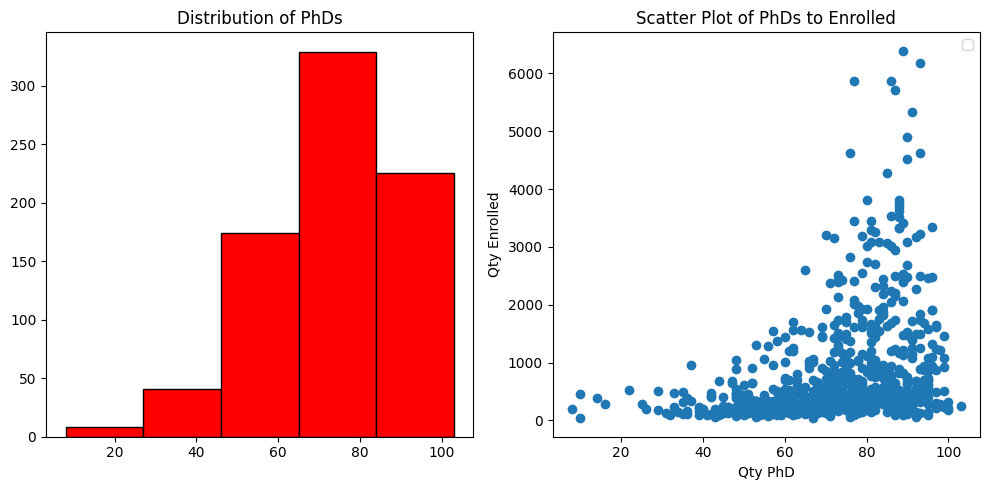

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

X = df_coll['PhD']
y = df_coll['Enroll']

# Plot data on each subplot
axs[0].hist(X, edgecolor='black', color='red', bins=5)
axs[0].set_title('Distribution of PhDs')
axs[1].scatter(X, y,)
axs[1].set_xlabel('Qty PhD')
axs[1].set_ylabel('Qty Enrolled')
axs[1].set_title('Scatter Plot of PhDs to Enrolled')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show
axs[1].legend()

# Show the plot
plt.show

Q3.

In [48]:
df_coll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [49]:
df_coll.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [50]:
# List all columns with dtype 'object'
object_columns = df_coll.select_dtypes(include='object').columns.tolist()

# Print the list of object columns
for i in object_columns:
  print(i)

Unnamed: 0
Private


In [51]:
df_coll.isna().sum()

Unnamed: 0     0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

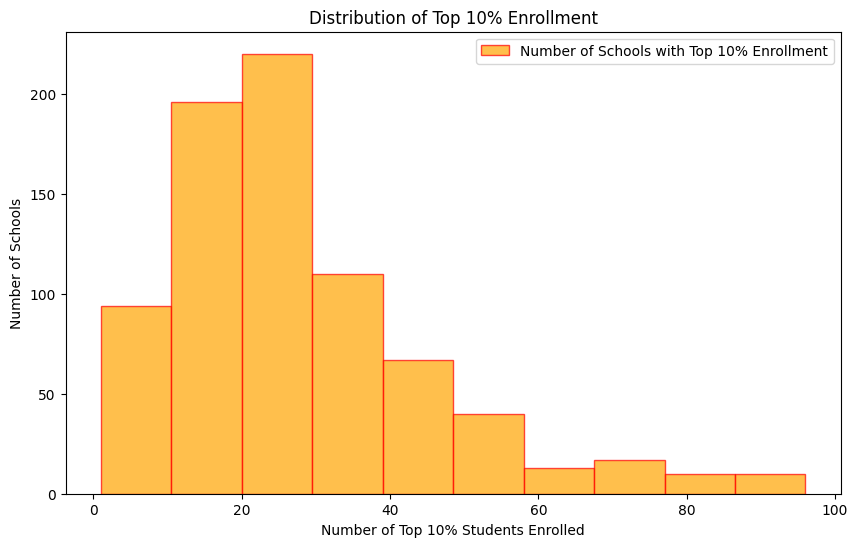

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(df_coll['Top10perc'], bins=10, color='orange', edgecolor='red', alpha=0.7, label='Number of Schools with Top 10% Enrollment')
plt.xlabel('Number of Top 10% Students Enrolled')
plt.ylabel('Number of Schools')
plt.title('Distribution of Top 10% Enrollment')
plt.legend()
plt.show()


In [53]:
df_coll['10_log1p'] = np.log1p(df_coll['Top10perc'])

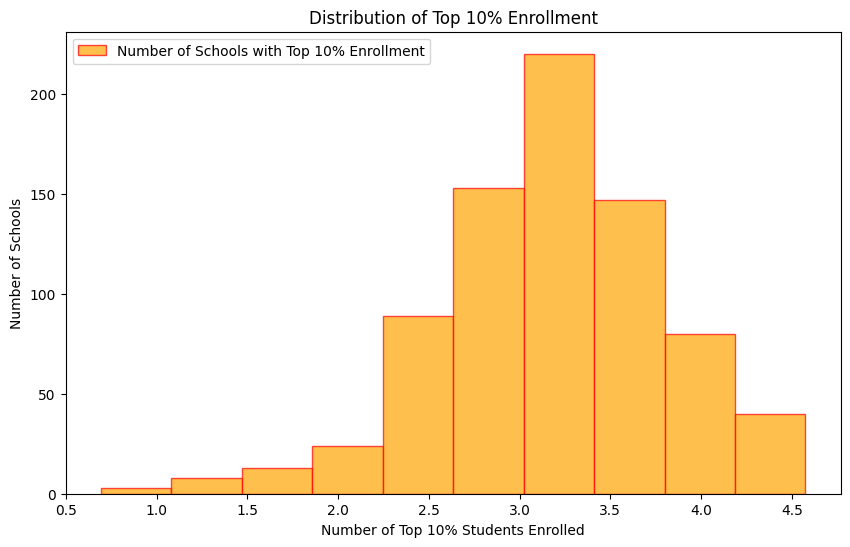

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(df_coll['10_log1p'], bins=10, color='orange', edgecolor='red', alpha=0.7, label='Number of Schools with Top 10% Enrollment')
plt.xlabel('Number of Top 10% Students Enrolled')
plt.ylabel('Number of Schools')
plt.title('Distribution of Top 10% Enrollment')
plt.legend()
plt.show()

In [55]:
# Calculate skewness for each column
skewness = df_coll['Top10perc'].skew()

# Calculate kurtosis for each column
kurtosis = df_coll['Top10perc'].kurtosis()

# Calculate skewness for each column
skewness_log = df_coll['10_log1p'].skew()

# Calculate kurtosis for each column
kurtosis_log = df_coll['10_log1p'].kurtosis()

"Good" Skewness: Typically between -0.5 and 0.5, indicating low skew.

"Good" Kurtosis: Close to 0, typically between -1 and 1, indicating a distribution similar to normal.

In [56]:
print('Skewness:', skewness)
print('Kurtosis:', kurtosis)
print('Skewness log:', skewness_log)
print('Kurtosis log:', kurtosis_log)

Skewness: 1.4132167808936722
Kurtosis: 2.208064686156094
Skewness log: -0.43373822064591594
Kurtosis log: 0.795502972123963


Q4

In [57]:
X = df_coll[['Top10perc']]
y = df_coll['Grad.Rate']

In [58]:
X['intercept'] = 1


C:\Users\cleme\AppData\Local\Temp\ipykernel_17084\2817329102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


In [59]:
X.head(5)

,Top10perc,intercept
0,23,1
1,16,1
2,22,1
3,60,1
4,16,1


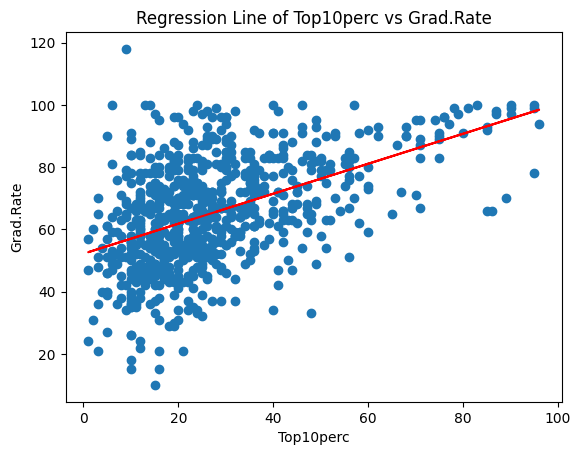

In [60]:
# prompt: plot with X and y and regression line

import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Get the predicted values
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X['Top10perc'], y)
plt.plot(X['Top10perc'], y_pred, color='red')
plt.xlabel('Top10perc')
plt.ylabel('Grad.Rate')
plt.title('Regression Line of Top10perc vs Grad.Rate')
plt.show()


In [61]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = sm.OLS(y_train, X_train).fit()

In [63]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.320
Method:                 Least Squares   F-statistic:                     73.78
Date:                Wed, 11 Jun 2025   Prob (F-statistic):           9.04e-15
Time:                        18:35:45   Log-Likelihood:                -616.74
No. Observations:                 156   AIC:                             1237.
Df Residuals:                     154   BIC:                             1244.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Top10perc      0.4930      0.057      8.590      0.000       0.380       0.606
intercept     52.2678      1.909     27.383      0.000      48.497      56.039
==============================================================================
Omnibus:                        1.354   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.948
Skew:                          -0.100   Prob(JB):                        0.623
Kurtosis:                       3.326   Cond. No.                         62.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)


# Calculate residuals
residuals = y_train - y_train_pred

# Calculate RMSE
rmse_train = np.sqrt(np.mean(residuals**2))

# Calculate residuals
residuals = y_test - y_pred

# Calculate RMSE
rmse_test = np.sqrt(np.mean(residuals**2))

print("Training RMSE: " + str(rmse_train))
print("Testing RMSE: " + str(rmse_test))

Training RMSE: 12.610110635367935
Testing RMSE: 15.449043268072959


Q7.

In [65]:
X = df_coll.drop(['Grad.Rate', 'Unnamed: 0', '10_log1p'], axis = 1)
y = df_coll['Grad.Rate']

In [66]:
LabelEncoder = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder.fit_transform(X[col])

In [67]:
corr = X.corr()


In [68]:
corr

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend
Private,1.000000,-0.432095,-0.475252,-0.567908,0.164132,0.095752,-0.615561,-0.452088,0.552650,0.340532,-0.018549,-0.304485,-0.156714,-0.129620,-0.472205,0.414775,0.258461
Apps,-0.432095,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592
Accept,-0.475252,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717
Enroll,-0.567908,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169
Top10perc,0.164132,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913
Top25perc,0.095752,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447
F.Undergrad,-0.615561,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652
P.Undergrad,-0.452088,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568
Outstate,0.552650,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779
Room.Board,0.340532,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739


Text(0.5, 1.0, 'Correlation Heatmap')

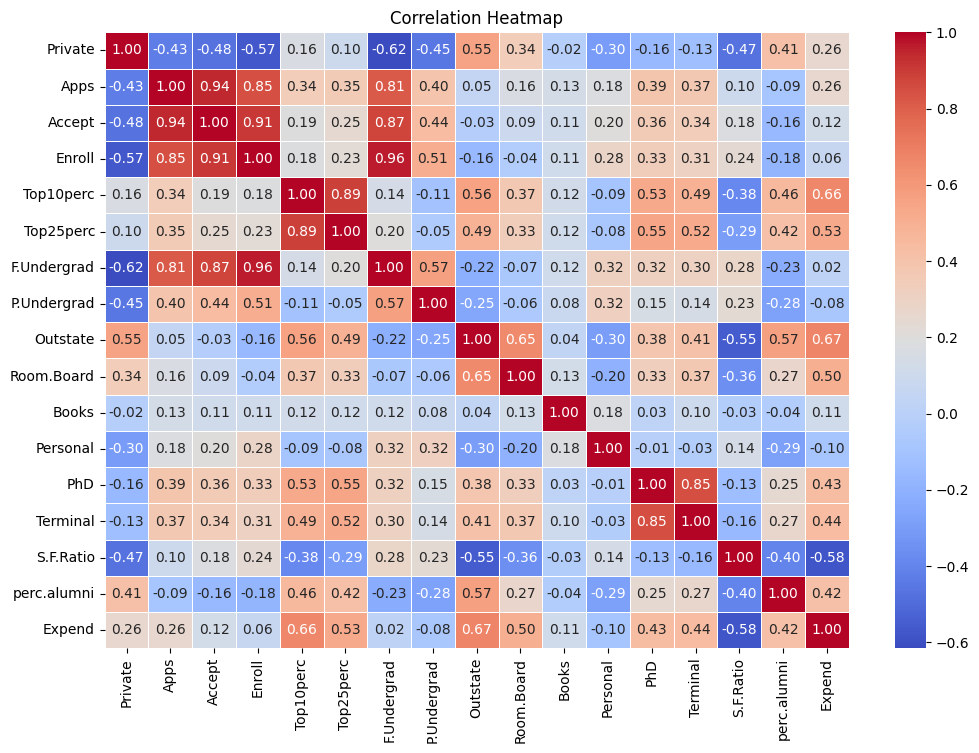

In [69]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, figure=plt.figure(figsize=(12, 8)))
plt.title('Correlation Heatmap')

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature in X
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

        feature         VIF
0       Private    8.934474
1          Apps   22.368649
2        Accept   35.747891
3        Enroll   37.175107
4     Top10perc   24.860872
5     Top25perc   48.467108
6   F.Undergrad   28.498758
7   P.Undergrad    2.216807
8      Outstate   32.574677
9    Room.Board   32.337800
10        Books   12.827515
11     Personal    5.881742
12          PhD   85.448444
13     Terminal  114.759103
14    S.F.Ratio   15.367443
15  perc.alumni    7.683930
16       Expend   13.141286


In [71]:
X['private_encoded'] = label_encoder.fit_transform(X['Private'])

NameError: name 'label_encoder' is not defined

In [ ]:
X = X.drop(['Private'], axis = 1)

In [ ]:
X['intercept'] = 1

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model2 = sm.OLS(y_train, X_train).fit()

this is the answer to a text response...

In [ ]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Grad.Rate   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     12.79
Date:                Mon, 02 Sep 2024   Prob (F-statistic):           2.18e-24
Time:                        01:52:26   Log-Likelihood:                -911.58
No. Observations:                 234   AIC:                             1859.
Df Residuals:                     216   BIC:                             1921.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Apps                0.0010      0.001      1.386      0.167      -0.000       0.002
Accept              0.0008      0.001      0.557      0.578      -0.002       0.004
Enroll              0.0029      0.005      0.630      0.529      -0.006       0.012
Top10perc           0.0061      0.144      0.043      0.966      -0.278       0.290
Top25perc           0.1706      0.109      1.569      0.118      -0.044       0.385
F.Undergrad        -0.0011      0.001     -1.376      0.170      -0.003       0.000
P.Undergrad        -0.0011      0.001     -2.115      0.036      -0.002   -7.67e-05
Outstate            0.0016      0.000      3.589      0.000       0.001       0.003
Room.Board          0.0015      0.001      1.379      0.169      -0.001       0.004
Books              -0.0017      0.005     -0.347      0.729      -0.012       0.008
Personal           -0.0012      0.001     -0.896      0.371      -0.004       0.001
PhD                 0.0018      0.097      0.019      0.985      -0.188       0.192
Terminal           -0.0299      0.113     -0.264      0.792      -0.253       0.194
S.F.Ratio           0.3237      0.321      1.010      0.314      -0.308       0.955
perc.alumni         0.1529      0.086      1.780      0.076      -0.016       0.322
Expend             -0.0002      0.000     -0.664      0.507      -0.001       0.000
private_encoded     0.6377      2.980      0.214      0.831      -5.236       6.512
intercept          29.2332      8.961      3.262      0.001      11.570      46.896
==============================================================================
Omnibus:                        3.654   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                3.732
Skew:                          -0.158   Prob(JB):                        0.155
Kurtosis:                       3.532   Cond. No.                     1.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_train_pred = model2.predict(X_train)

# Calculate residuals
residuals_train = y_train - y_train_pred

# Calculate RMSE
rmse_train = np.sqrt(np.mean(residuals_train**2))

# Calculate residuals
residuals_test = y_test - y_pred

# Calculate RMSE
rmse_test = np.sqrt(np.mean(residuals_test**2))

print("Training RMSE: " + str(rmse_train))
print("Testing RMSE: " + str(rmse_test))

Training RMSE: 11.902049877964878
Testing RMSE: 15.133526746390658


In [ ]:
X_tuned = X.drop(['Terminal', 'PhD'], axis=1)

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(X_tuned, y, test_size=0.3, random_state=42)

In [ ]:
model3 = sm.OLS(y_train, X_train).fit()

In [ ]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Grad.Rate   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              440.6
Date:                Wed, 11 Jun 2025   Prob (F-statistic):                   2.60e-154
Time:                        17:53:56   Log-Likelihood:                         -917.64
No. Observations:                 234   AIC:                                      1865.
Df Residuals:                     219   BIC:                                      1917.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Private         2.3474      2.906      0.808      0.420      -3.381       8.075
Apps            0.0010      0.001      1.381      0.169      -0.000       0.003
Accept          0.0001      0.001      0.080      0.936      -0.003       0.003
Enroll          0.0062      0.005      1.360      0.175      -0.003       0.015
Top10perc      -0.1026      0.141     -0.730      0.466      -0.380       0.175
Top25perc       0.2604      0.102      2.553      0.011       0.059       0.461
F.Undergrad    -0.0015      0.001     -1.963      0.051      -0.003    6.01e-06
P.Undergrad    -0.0012      0.001     -2.166      0.031      -0.002      -0.000
Outstate        0.0018      0.000      4.124      0.000       0.001       0.003
Room.Board      0.0025      0.001      2.426      0.016       0.000       0.004
Books           0.0008      0.005      0.164      0.870      -0.009       0.011
Personal        0.0004      0.001      0.334      0.739      -0.002       0.003
S.F.Ratio       1.1347      0.208      5.464      0.000       0.725       1.544
perc.alumni     0.1766      0.087      2.026      0.044       0.005       0.348
Expend      -5.041e-06      0.000     -0.018      0.986      -0.001       0.001
==============================================================================
Omnibus:                        1.039   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.734
Skew:                           0.086   Prob(JB):                        0.693
Kurtosis:                       3.214   Cond. No.                     6.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_train_pred = model3.predict(X_train)

# Calculate residuals
residuals_train = y_train - y_train_pred

# Calculate RMSE
rmse_train = np.sqrt(np.mean(residuals_train**2))

# Calculate residuals
residuals_test = y_test - y_pred

# Calculate RMSE
rmse_test = np.sqrt(np.mean(residuals_test**2))

print("Training RMSE: " + str(rmse_train))
print("Testing RMSE: " + str(rmse_test))

Training RMSE: 12.21419343079833
Testing RMSE: 15.138397668074898
